# CMPS AI in Medicine module "Ear" Homework - Ideal Binary Mask

# Welcome! This code is for the 'EAR' part of the AI in medicine module for CPMS Spring 2025. Here, we apply the *Ideal Binary Mask* discussed in class.

#The assignment is in coursework under files>assignments in module 3, the EAR part.

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

#Credit for the original version of this code:
# Created on Wed Aug  8 20:26:54 2018  @author: simon.suthers
#Scipy inverse short term fourier transform
#http://scipy.github.io/devdocs/generated/scipy.signal.stft.html
#http://www.cs.northwestern.edu/~pardo/courses/eecs352/lectures/MPM14-Time-Frequency-Masking.pdf


from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

from math import ceil

##### some background on the lines above, which call libraries of functions needed for the code:
##### NumPy (Numerical Python) is an open source Python library for working with numerical data in Python.

##### SciPy stands for Scientific Python.
##### It provides functions for optimization, statistics and signal processing.

##### matplotlib.pyplot is a plotting library

##### scipy.io has functions to read data from and write data to a variety of file formats.

##### math is a library of math commands

######################
######################
##### Import 2 wav files -- here you need to refer to the folder and file name in your google drive.

from IPython.display import Audio, display
file1 = "/content/drive/MyDrive/Ear_Files/babble6s.wav" #noise file "something.wav" (noise6s.wav default)
display(Audio(file1, autoplay=False))
# if make autoplay=True then it plays automatically, if autoplay=False you need to hit the arrow.


In [ ]:
from IPython.display import Audio, display
file2 = "/content/drive/MyDrive/Ear_Files/Speech_File.wav" #signal file "something.wav"
display(Audio(file2, autoplay=False))

In [ ]:
#Read 2 wav files
sample_rate1, samples1 = wavfile.read(file1)
sample_rate2, samples2 = wavfile.read(file2)

# The three lines below output the values of these rates at the bottom of the code cell -- they are just for checking
print("here are the two sample rates, found from the .wav files. They should both be 16000")
print(sample_rate1,sample_rate2)
print("wav file values are 16 bit integers, here are two example values",samples1[1],samples1[1571])


# These two lines needed if by mistake you recorded stereo instead of mono signals in audacity.
# samples1 = samples1[:,1];
# samples2 = samples2[:,1];

#Find length of longest signal
maxlength = max(len(samples1),len(samples2))
print("length of the two samples is:", len(samples1), len(samples2))  # this prints the length of samples
print("best if lengths are pretty close but don't need to be equal")

#Pad each signal to the length of the longest signal
samples1 = np.pad(samples1, (0, maxlength - len(samples1)), 'constant', constant_values=(0))
samples1=samples1*3  # use this to change signal1 amplitude in combined signal
samples2 = np.pad(samples2, (0, maxlength - len(samples2)), 'constant', constant_values=(0))

#combine signals together
combined_signals = samples1 + samples2

# this padding to a whole number of seconds seems needed for the Inverse STFT
#Pad 3 wav files to whole number of seconds
extrapadding = (ceil(len(combined_signals) / sample_rate1) * sample_rate1) - len(combined_signals)
combined_signals = np.pad(combined_signals, (0,extrapadding), 'constant', constant_values=(0))
samples1 = np.pad(samples1, (0,extrapadding), 'constant', constant_values=(0))
samples2 = np.pad(samples2, (0,extrapadding), 'constant', constant_values=(0))


here are the two sample rates, found from the .wav files. They should both be 16000
16000 16000
wav file values are 16 bit integers, here are two example values -412 422
length of the two samples is: 105785 96409
best if lengths are pretty close but don't need to be equal


In [ ]:
#%% Save combined wav file and play it

#Save combined series to wav file

wavfile.write('combined_signals.wav', sample_rate1, np.asarray(combined_signals, dtype=np.int16))

combinedSignals = "combined_signals.wav";
display(Audio(combinedSignals, autoplay=False))



<Figure size 640x480 with 0 Axes>

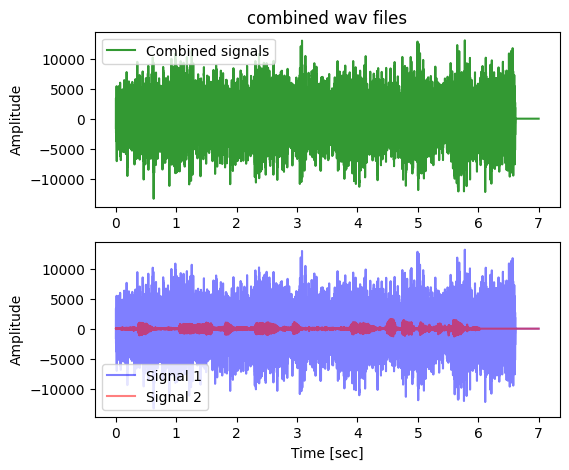

In [ ]:
#%% Show 3 wav files in plot

# x is time variable that ranges from zero to total time (total_samples/sample_rate), in steps of 1/sample_rate
x = np.arange(0, (len(combined_signals) / sample_rate1), (1 / sample_rate1))

#Show wav file on chart

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,5), sharey=True)

ax1.plot(x, combined_signals, color="green", alpha = 0.8)
ax1.set(title='combined wav files', ylabel='Amplitude')
ax1.legend(['Combined signals'])

ax2.plot(x, samples1, color="blue", alpha = 0.5)
ax2.plot(x, samples2, color="red", alpha = 0.5)
ax2.set(xlabel='Time [sec]', ylabel='Amplitude')
ax2.legend(['Signal 1', 'Signal 2'])

plt.show()
plt.close(fig)





stft timewindow in seconds is 0.1
first few plotted times (seconds) are 0.050 0.100  0.150 - from this you can see how the time window is shifted along
first few plotted frequencies (Hz) are 10 20 30


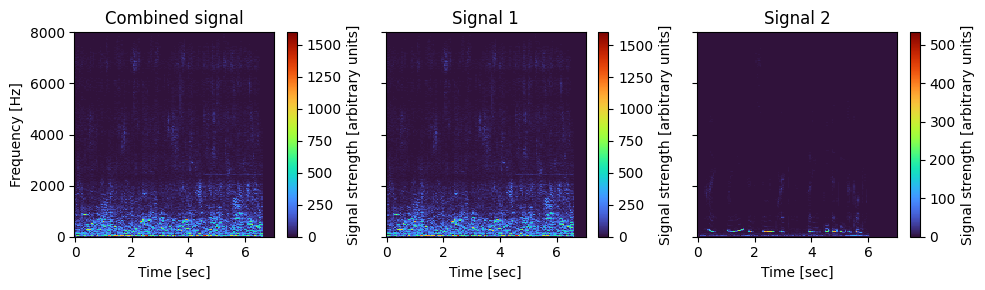

In [ ]:
#%% Compute the STFT of the 3 wav files

#Length of the stft window. Something around .05 - 0.1 second will probably sound good, .02 second is more practical, try a range from .02 to .2.
#             experiment with it (observe how the spectrogram looks and listen to the Inverse STFT)
timewindow = 0.1
nperseg = sample_rate1 * timewindow
print("stft timewindow in seconds is", timewindow)
#Get stft of 3 wav files
f1, t1, Zsamples1 = signal.stft(samples1, fs=sample_rate1, nperseg=nperseg)
f2, t2, Zsamples2 = signal.stft(samples2, fs=sample_rate2, nperseg=nperseg)
fcombined, tcombined, Zcombined = signal.stft(combined_signals, fs=sample_rate1, nperseg=nperseg)
note1="first few plotted times (seconds) are %1.3f %1.3f % 1.3f - from this you can see how the time window is shifted along" % (t1[1], t1[2], t1[3])
print(note1)
note2="first few plotted frequencies (Hz) are %1.0f %1.0f %1.0f" % (f1[1], f1[2], f1[3])
print(note2)


# Plot Spectrogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

# the above makes a figure with 3 plots side by side, with the same y axis
# the three plots are spectrograms -- they have time on the x axis, frequency on the y axis
# and the intensity of the color indicates the amplitude of the fourier transform at that time and frequency
# I used the coloring 'turbo' -- you can try others, like "Blues" or look into python to find other options

cm1 = ax1.pcolormesh(tcombined, fcombined, np.abs(Zcombined), cmap='turbo')
ax1.set(title='Combined signal', xlabel='Time [sec]', ylabel='Frequency [Hz]')
fig.colorbar(cm1, ax=ax1, label='Signal strength [arbitrary units]')

cm2 = ax2.pcolormesh(t1, f1, np.abs(Zsamples1), cmap='turbo')
ax2.set(title='Signal 1', xlabel='Time [sec]')
fig.colorbar(cm2, ax=ax2, label='Signal strength [arbitrary units]')

cm3 = ax3.pcolormesh(t2, f2, np.abs(Zsamples2), cmap='turbo')
ax3.set(title='Signal 2', xlabel='Time [sec]')
fig.colorbar(cm3, ax=ax3, label='Signal strength [arbitrary units]')

plt.tight_layout()


plt.show()
plt.close(fig)


the maximum value in the array at this stage is 14
the max and min values in the array at this (later) stage are 1 and 0 - you have generated the binary mask


/tmp/ipython-input-3595495237.py:10: RuntimeWarning: invalid value encountered in divide
  snr = np.divide(np.abs(Zsample), np.abs(Zcombined))


<Figure size 640x480 with 0 Axes>

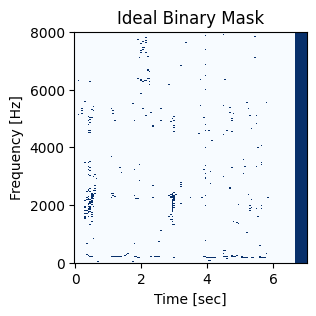

<Figure size 640x480 with 0 Axes>

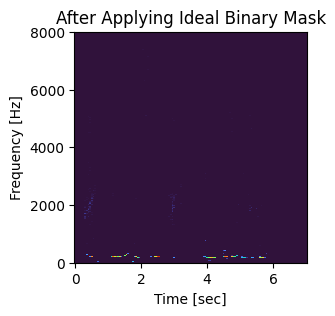

In [ ]:

#%% Create mask and apply it to the signal
# Create ideal binary mask for signal 1 or 2 -- whichever is the non-noise signal
# (Note which sample is the clean signal in the two code lines below)

Zsample = Zsamples2  # if the second wav file is the non-noise signal this is Zsamples2
sample = samples2 # if the second wav file is the non-noise signal this is samples2

#Calculate signal to noise ratio of clean signal versus combined signal

snr = np.divide(np.abs(Zsample), np.abs(Zcombined))

#next few steps round snr to 0 (if it is less than 1) or 1 (if it is greater than 1)
mask = np.around(snr, 0)  # this rounds to nearest integer
#convert all nan (nan = not a number) to 1 (it doesn't matter if this is 0 or 1)
mask[np.isnan(mask)] = 1
#check to see what maximum value in array is at this stage
check=np.amax(mask)
note4="the maximum value in the array at this stage is %1.0f" % (check)
print(note4)
#replace all values over 1 with 1
mask[mask > 1] = 1
#check to see what maximum value in array is now
check2=np.amax(mask)
check3=np.amin(mask)
note5="the max and min values in the array at this (later) stage are %1.0f and %1.0f - you have generated the binary mask" % (check2, check3)
print(note5)

#%% Show mask
fig = plt.figure()
fig, ax1 =plt.subplots(1,1, figsize=(3,3))
ax1.pcolormesh(tcombined, fcombined, mask, cmap='Blues')
ax1.set(title='Ideal Binary Mask', xlabel='Time [sec]', ylabel='Frequency [Hz]')
#fig.savefig(picturepath + "mask.png", bbox_inches="tight")
plt.show()
plt.close(fig)

#Finally, apply mask: Element-wise multiply mask with mixed signal spectrogram
Zsamplesmasked = np.multiply(Zcombined, mask)

fig = plt.figure()
fig, ax1 =plt.subplots(1,1, figsize=(3,3))
ax1.pcolormesh(tcombined, fcombined, np.abs(Zsamplesmasked), cmap='turbo')
ax1.set(title='After Applying Ideal Binary Mask', xlabel='Time [sec]', ylabel='Frequency [Hz]')
#fig.savefig(picturepath + "mask.png", bbox_inches="tight")
plt.show()
plt.close(fig)


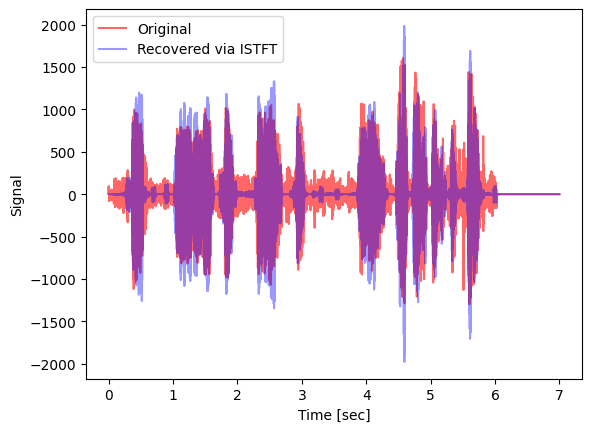

In [ ]:
#%% convert back to a time series via inverse STFT

time, samplesrec = signal.istft(Zsamplesmasked, sample_rate1)
# this "time" is the same values as x defined above, the inverse STFT returns this value but we don't need it
# samplesrec are the "recovered samples" -- the signal after the mask has been applied

#%% Compare the original signal with recovered signal
fig = plt.figure()
plt.plot(x, sample, color="red", alpha = 0.6)
plt.plot(x, samplesrec, color="blue", alpha = 0.4)
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.legend(['Original', 'Recovered via ISTFT'])
plt.show()
plt.close(fig)



In [ ]:
#%% Save recovered signal as wav file and play it

#Save combined series to wav file
#wavfile.write(filepath + '/recovered.wav', sample_rate1, np.asarray(samplesrec, dtype=np.int16))

# wavfile.write('recovered.wav', sample_rate1, np.asarray(mixed_series, dtype=np.int16))
wavfile.write('recovered.wav', sample_rate1, np.asarray(samplesrec, dtype=np.int16))

recovered = 'recovered.wav';
display(Audio(recovered, autoplay=True))


In [37]:
# need to export (1) combined_signal, (2) recovered signal

# the exclamation point means these commands are executed in the operating system shell (not python)
# Create a folder in the root directory
!mkdir -p "/content/drive/MyDrive/Ear_Files/outputs"

# Copy the combined_signal and recovered signal files to the new directory.
!cp recovered.wav /content/drive/MyDrive/Ear_Files/outputs

!cp combined_signals.wav /content/drive/MyDrive/Ear_Files/outputs

note6="Saved signals to HWfiles > outputs folder in my Google Drive"
print(note6)




Saved signals to HWfiles > outputs folder in my Google Drive
